In [2]:
#Import the Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

In [3]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 6)

In [5]:
df.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [6]:
df.columns.to_list()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.iloc[-5:]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
# np.unique(df["Species"])
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df=df.drop(columns=['Id'])


In [12]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.info

<bound method DataFrame.info of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

<function matplotlib.pyplot.show(close=None, block=None)>

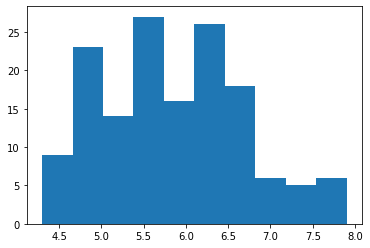

In [14]:
plt.hist(df["SepalLengthCm"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

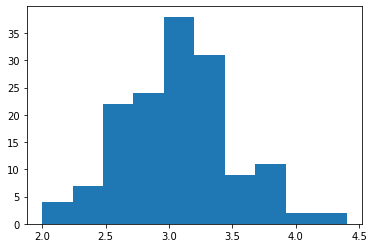

In [15]:
plt.hist(df["SepalWidthCm"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

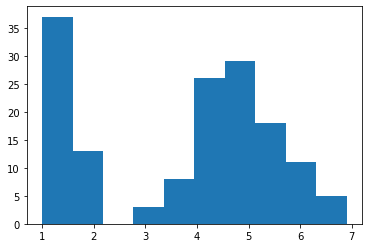

In [16]:
plt.hist(df["PetalLengthCm"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

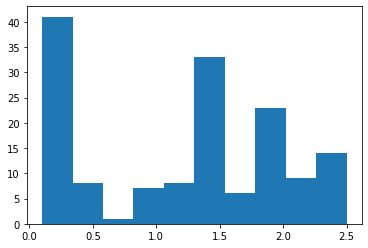

In [17]:
plt.hist(df["PetalWidthCm"])
plt.show

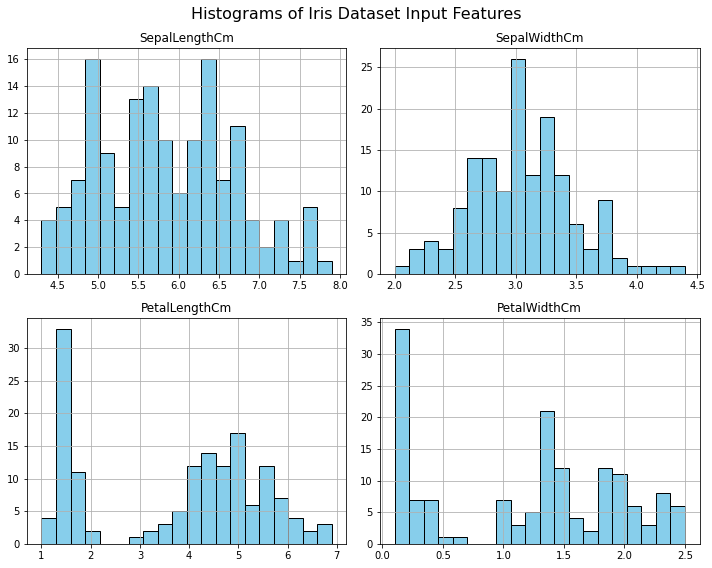

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


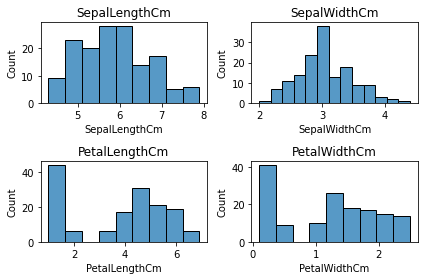

In [18]:

# Plot histograms for all input features
df.hist(bins=20, figsize=(10, 8), edgecolor='black', color='skyblue')
plt.suptitle("Histograms of Iris Dataset Input Features", fontsize=16)
plt.tight_layout()
plt.show()
tmpDf = df.drop(['Species'], axis=1)
print(df.columns)
for i, col in enumerate(tmpDf.columns):
    plt.subplot(2,2,i+1)
    sns.histplot(x=tmpDf[col])
    plt.title(col)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

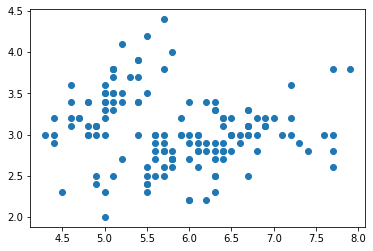

In [19]:
plt.scatter(df["SepalLengthCm"],df["SepalWidthCm"])
plt.show

In [20]:
print(df.columns)


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


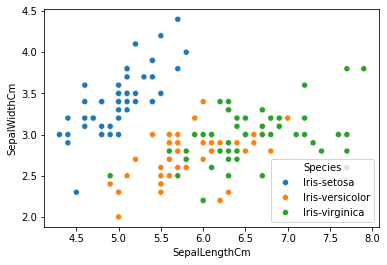

In [21]:
sns.scatterplot(data=df,x="SepalLengthCm",y="SepalWidthCm",hue="Species")
plt.show()

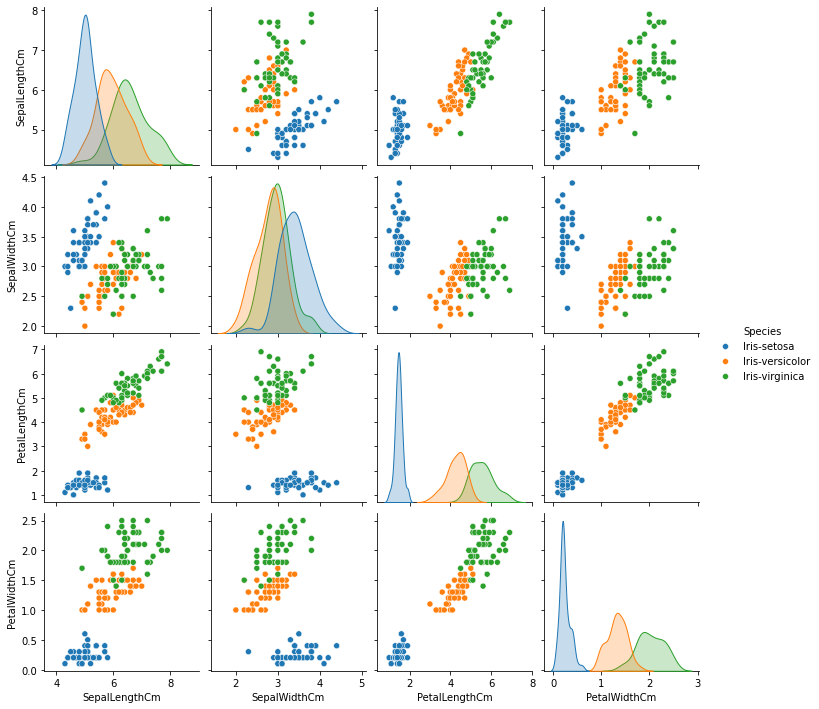

In [22]:
import seaborn as sns
sns.pairplot(df,hue='Species')
plt.show()

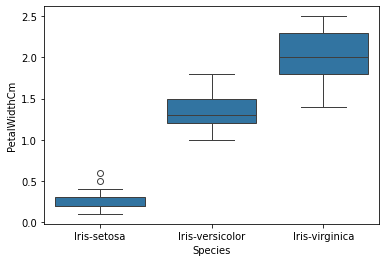

In [23]:
sns.boxplot(data=df,x='Species',y='PetalWidthCm')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

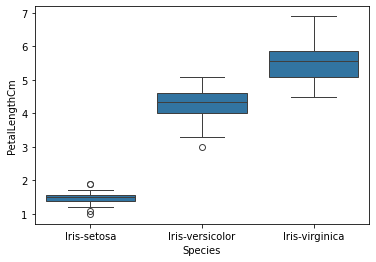

In [24]:
sns.boxplot(data=df,x='Species',y='PetalLengthCm')
plt.show

In [25]:
correlation=df.drop(['Species'],axis=1).corr()
print(correlation)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


In [26]:
x=df.drop(['Species'],axis=1)
y=df['Species']

In [27]:
x ,y

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0              5.1           3.5            1.4           0.2
 1              4.9           3.0            1.4           0.2
 2              4.7           3.2            1.3           0.2
 3              4.6           3.1            1.5           0.2
 4              5.0           3.6            1.4           0.2
 ..             ...           ...            ...           ...
 145            6.7           3.0            5.2           2.3
 146            6.3           2.5            5.0           1.9
 147            6.5           3.0            5.2           2.0
 148            6.2           3.4            5.4           2.3
 149            5.9           3.0            5.1           1.8
 
 [150 rows x 4 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Ir

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [29]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_pred))

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [30]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

